# Bitcoin Price Analysis & Prediction

### Import the Libraries

In [43]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bitcoin-dataset/BTC (2017-2020).csv


In [1]:
from pandas_datareader import data, wb
import seaborn as sns
import tensorflow as tf
import math
import datetime
import plotly
import cufflinks as cf
cf.go_offline()

## Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('../input/bitcoin-dataset/BTC (2017-2020).csv')

In [44]:
df.head(11)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-11,2423.709961,2275.139893,2332.770020,2398.840088,1.117410e+09,2398.840088
2017-07-12,2425.219971,2340.830078,2402.699951,2357.899902,8.357700e+08,2357.899902
2017-07-13,2363.250000,2183.219971,2360.590088,2233.340088,8.825030e+08,2233.340088
2017-07-14,2231.139893,1990.410034,2230.120117,1998.859985,9.936080e+08,1998.859985
2017-07-15,2058.770020,1843.030029,1991.979980,1929.819946,1.182870e+09,1929.819946
2017-07-16,2230.489990,1932.619995,1932.619995,2228.409912,1.201760e+09,2228.409912
2017-07-17,2387.610107,2164.770020,2233.520020,2318.879883,1.512450e+09,2318.879883
2017-07-18,2397.169922,2260.229980,2323.080078,2273.429932,1.245100e+09,2273.429932
2017-07-19,2900.699951,2269.889893,2269.889893,2817.600098,2.249260e+09,2817.600098


In [45]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Text(0.5, 1.0, 'Date vs Volume')

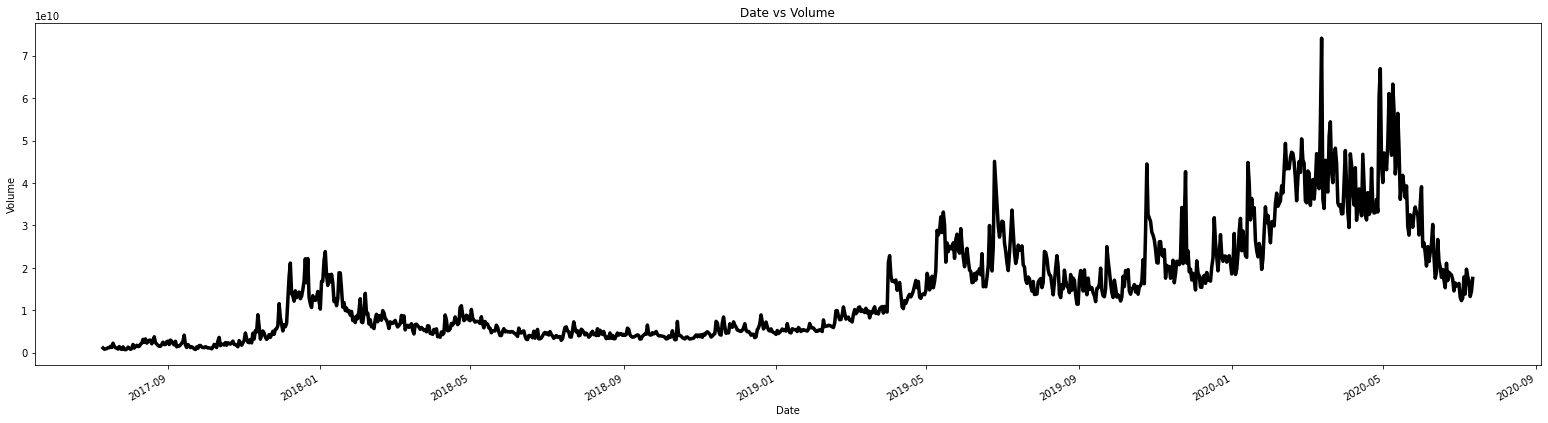

In [46]:
plt.figure(figsize=(27,7))
df.groupby('Date')['Volume'].median().plot(linewidth = 3.5, color = 'k')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume")

Text(0.5, 1.0, 'Date vs Open of 2020')

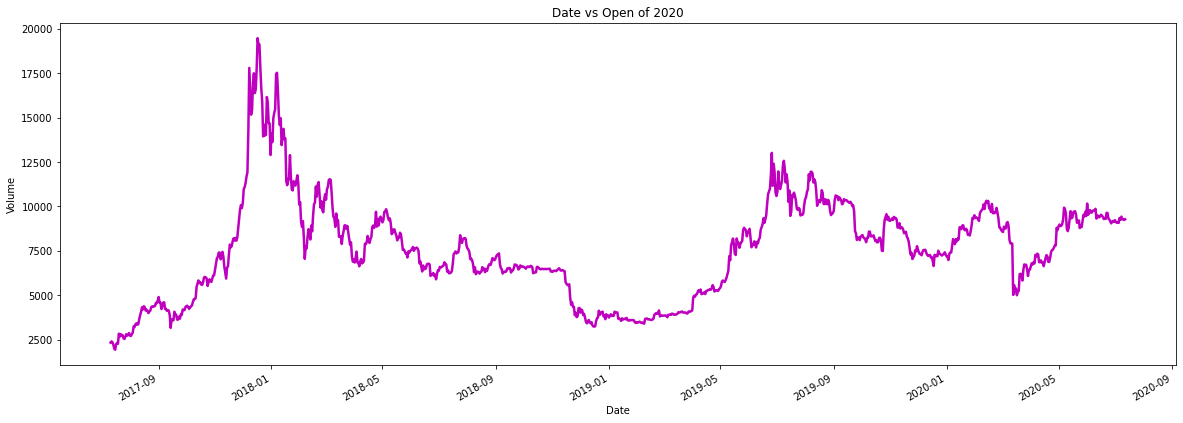

In [47]:
plt.figure(figsize=(20,7))
df.groupby('Date')['Open'].mean().plot(linewidth = 2.5, color = 'm')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Open of 2020")

Text(0.5, 1.0, 'Date vs High of 2020')

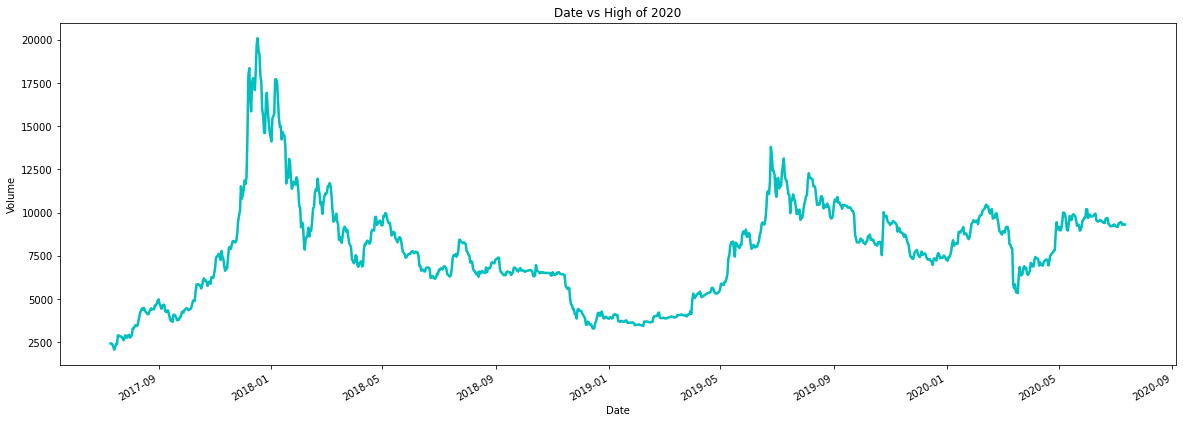

In [48]:
plt.figure(figsize=(20,7))
df.groupby('Date')['High'].mean().plot(linewidth = 2.5, color = 'c')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs High of 2020")

Text(0.5, 1.0, 'Date vs Low of 2020')

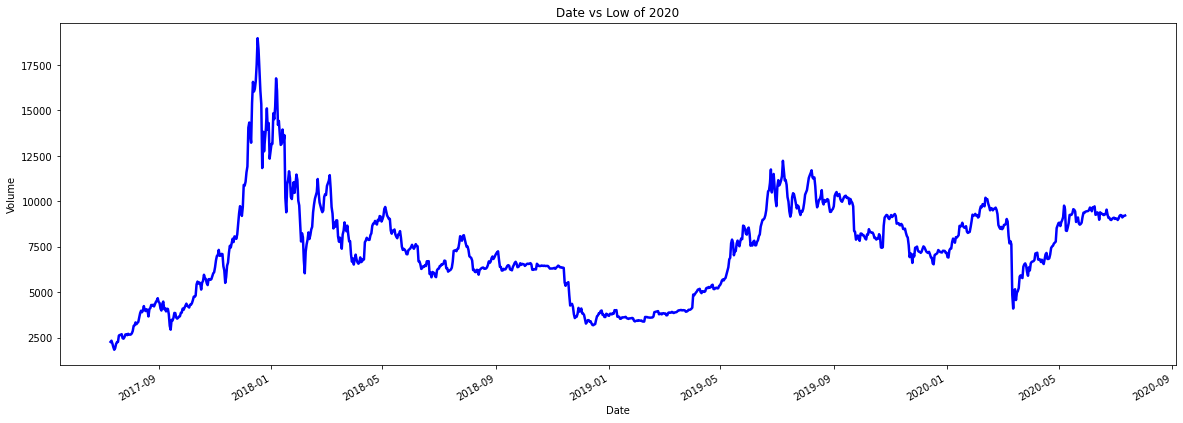

In [49]:
plt.figure(figsize=(20,7))
df.groupby('Date')['Low'].mean().plot(linewidth = 2.5, color = 'b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Low of 2020")

Text(0.5, 1.0, 'Date vs Close of 2020')

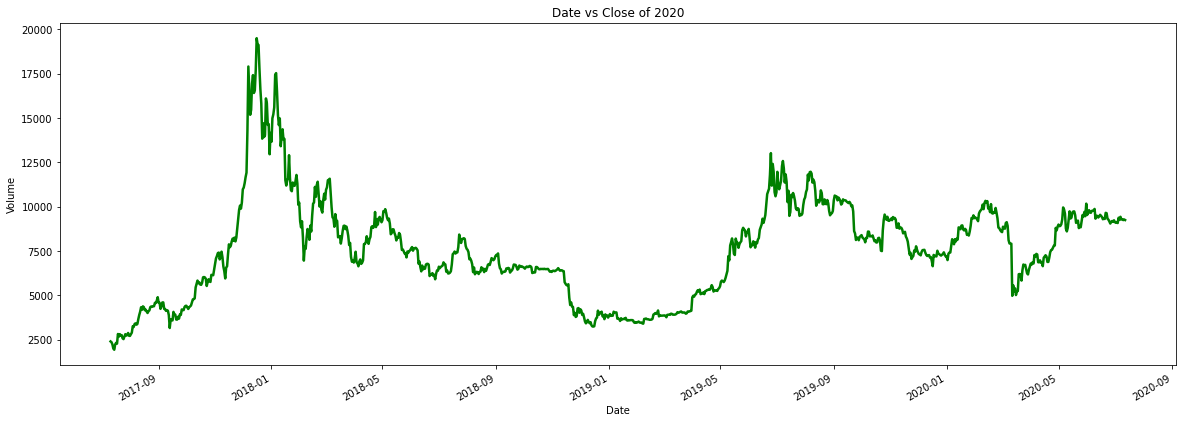

In [50]:
plt.figure(figsize=(20,7))
df.groupby('Date')['Close'].mean().plot(linewidth = 2.5, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2020")

In [51]:
new_df =pd.read_csv('../input/bitcoin-dataset/BTC (2017-2020).csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method='ffill')

<AxesSubplot:>

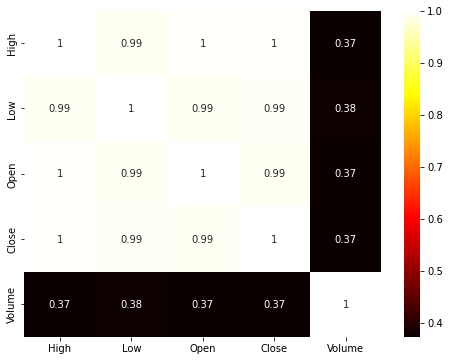

In [52]:
import seaborn as sns
plt.figure(figsize = (8,6))
sns.heatmap(new_df.corr() , cmap = 'hot', annot = True)

In [54]:
X = new_df.drop('High', axis=1)
y = new_df['High']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (1097, 4)
Shape of y =  (1097,)


## Split The Data

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (767, 4)
Shape of y_train =  (767,)
Shape of X_test =  (330, 4)
Shape of y_test =  (330,)


## Machine Learning Model: Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [59]:
regressor.score(X_test, y_test)

0.9966296166397655

## Deep Learning Model: Stacked LSTM 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2021-10-24 12:15:45.065447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 12:15:45.067114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 12:15:45.068371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 12:15:45.073593: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2021-10-24 12:15:48.122170: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-24 12:15:52.560138: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


11/11 [==============================] - 7s 100ms/step - loss: 0.0394 - val_loss: 0.0063
Epoch 2/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0118 - val_loss: 0.0051
Epoch 3/100
11/11 [==============================] - 0s 18ms/step - loss: 0.0081 - val_loss: 0.0030
Epoch 4/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 5/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0053 - val_loss: 0.0022
Epoch 6/100
11/11 [==============================] - 0s 18ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 7/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 8/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 9/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 10/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 11/1

## Prediction

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

7948.475862258728

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

8201.306938622489

## Visualization

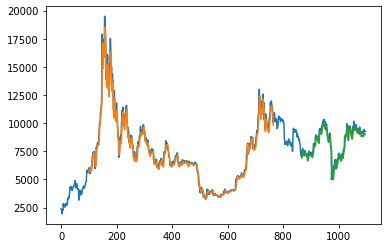

In [32]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()